# Exercises for PyTorch Workflow

https://www.learnpytorch.io/01_pytorch_workflow/#exercises

In [51]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

print(torch.__version__)
print(np.__version__)

2.6.0.dev20241126
1.26.4


In [52]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

Using device: mps


## Create a straight line dataset using the linear regression formula (weight * X + bias).
- Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
- Split the data into `80% training, 20% testing`.
- Plot the training and testing data so it becomes visual.

In [53]:
weight = 0.3
bias = 0.9
start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"{X[:10]}\n y: {y[:10]}")
split_shit = int((0.8)*len(X))
X_train, y_train = X[:split_shit], y[:split_shit]
X_test, y_test = X[split_shit:], y[split_shit:]
print(len(X_train), len(y_train), len(X_test), len(y_test))

Number of X samples: 100
Number of y samples: 100
tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
 y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])
80 80 20 20


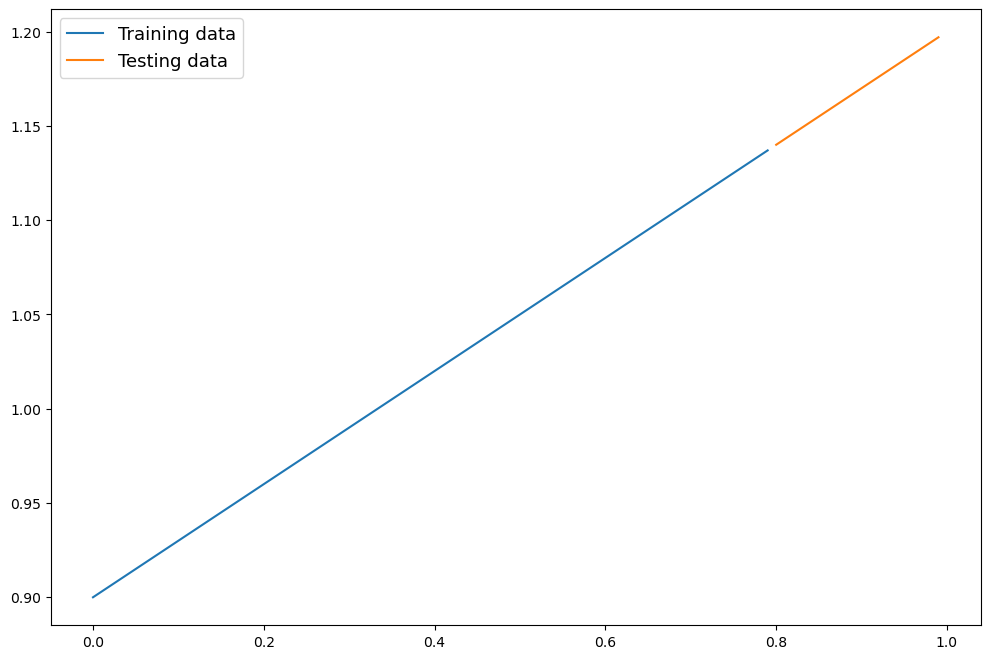

In [54]:
# Plotting the graph
def plot_predictions(train_features = X_train, train_labels = y_train, test_features=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(12, 8))
  plt.plot(train_features, train_labels, label="Training data")
  plt.plot(test_features, test_labels, label = "Testing data")
  if(predictions is not None):
    plt.scatter(test_features, predictions, c = 'g', s=4, label="Prediction")
  plt.legend(prop ={"size": 13})
  plt.show()
plot_predictions()

## Build a PyTorch model by subclassing nn.Module.
- Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
- Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
- Once you've constructed the model, make an instance of it and check its state_dict().
<p>Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.</p>

In [55]:
class LinearRegressionExercise(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


In [56]:
torch.manual_seed(40)
model_01_exercise=LinearRegressionExercise()
print(model_01_exercise)
print(model_01_exercise.state_dict(), weight, bias)

LinearRegressionExercise(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
OrderedDict([('linear_layer.weight', tensor([[-0.2642]])), ('linear_layer.bias', tensor([0.7322]))]) 0.3 0.9


# Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
- Set the learning rate of the optimizer to be _0.01_ and the parameters to optimize should be the model parameters from the model you created in 2.
- Write a training loop to perform the appropriate training steps for 300 epochs.
- The training loop should test the model on the test dataset every 20 epochs.

In [57]:
print(next(model_01_exercise.parameters()).device)
list(model_01_exercise.parameters())

cpu


[Parameter containing:
 tensor([[-0.2642]], requires_grad=True),
 Parameter containing:
 tensor([0.7322], requires_grad=True)]

In [58]:
model_01_exercise.to(device)
print(next(model_01_exercise.parameters()).device)
list(model_01_exercise.parameters())

mps:0


[Parameter containing:
 tensor([[-0.2642]], device='mps:0', requires_grad=True),
 Parameter containing:
 tensor([0.7322], device='mps:0', requires_grad=True)]

In [59]:
# loss function
loss_fn = nn.L1Loss()
# optimizer
optimizer = torch.optim.SGD(params=(model_01_exercise.parameters()), lr=0.01)

In [60]:
# training loop
torch.manual_seed(40)

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test=X_test.to(device)
y_test = y_test.to(device)

epoch_list = []
trainLoss_list = []
testLoss_list = []

epochs = 300

for epoch in range(epochs):
  # set model to train mode
  model_01_exercise.train()
  # forward pass
  y_preds = model_01_exercise(X_train)
  # calculate the loss
  loss = loss_fn(y_preds, y_train)
  # set optimizer to zero grad
  optimizer.zero_grad()
  # do the backprop
  loss.backward()
  # run the gradient descent
  optimizer.step()

  #testing loop begins
  if(epoch % 20 == 0):
    model_01_exercise.eval()
    with torch.inference_mode():
      y_test_pred = model_01_exercise(X_test)
      test_loss = loss_fn(y_test_pred, y_test)
      epoch_list.append(epoch)
      trainLoss_list.append(loss)
      testLoss_list.append(test_loss)

      print(f"Epochs: {epoch} | Train Loss: {loss:.3f} | Test Loss: {test_loss:.3f}")

Epochs: 0 | Train Loss: 0.391 | Test Loss: 0.659
Epochs: 20 | Train Loss: 0.164 | Test Loss: 0.393
Epochs: 40 | Train Loss: 0.087 | Test Loss: 0.240
Epochs: 60 | Train Loss: 0.074 | Test Loss: 0.183
Epochs: 80 | Train Loss: 0.067 | Test Loss: 0.158
Epochs: 100 | Train Loss: 0.060 | Test Loss: 0.141
Epochs: 120 | Train Loss: 0.053 | Test Loss: 0.125
Epochs: 140 | Train Loss: 0.046 | Test Loss: 0.109
Epochs: 160 | Train Loss: 0.040 | Test Loss: 0.092
Epochs: 180 | Train Loss: 0.033 | Test Loss: 0.076
Epochs: 200 | Train Loss: 0.026 | Test Loss: 0.060
Epochs: 220 | Train Loss: 0.019 | Test Loss: 0.044
Epochs: 240 | Train Loss: 0.012 | Test Loss: 0.028
Epochs: 260 | Train Loss: 0.005 | Test Loss: 0.012
Epochs: 280 | Train Loss: 0.002 | Test Loss: 0.014


## Make predictions with the trained model on the test data.
- Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).


In [61]:
# time to make predictions
model_01_exercise.eval()

with torch.inference_mode():
  predict = model_01_exercise(X_test)
print(predict)

tensor([[1.1403],
        [1.1433],
        [1.1462],
        [1.1492],
        [1.1521],
        [1.1551],
        [1.1580],
        [1.1610],
        [1.1639],
        [1.1669],
        [1.1698],
        [1.1728],
        [1.1757],
        [1.1786],
        [1.1816],
        [1.1845],
        [1.1875],
        [1.1904],
        [1.1934],
        [1.1963]], device='mps:0')


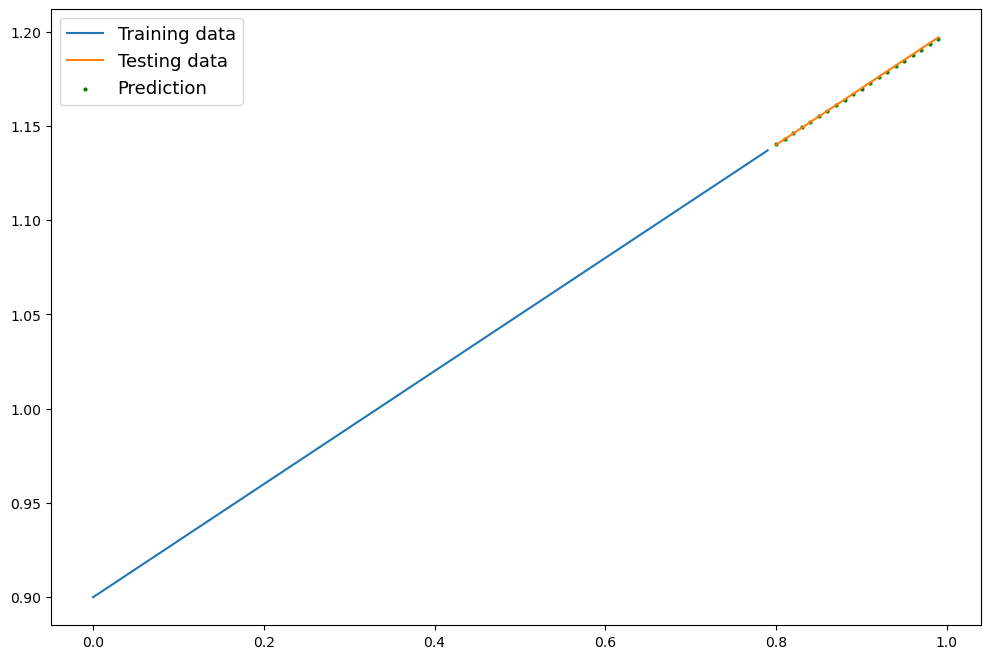

In [62]:
# we need to put the predict to cpu bcoz numpy works on cpu, coz we gotta plot this
predict = predict.cpu()
plot_predictions(predictions=predict)

In [66]:
# Plotting the loss curve
trainLoss_list = np.array(torch.tensor(trainLoss_list).numpy())
testLoss_list = np.array(torch.tensor(testLoss_list).numpy())
trainLoss_list, testLoss_list

(array([0.39067227, 0.16442446, 0.08731291, 0.07414167, 0.06695624,
        0.06009626, 0.05324445, 0.04639333, 0.03954176, 0.03269   ,
        0.0258388 , 0.01898712, 0.01213542, 0.00528423, 0.00241335],
       dtype=float32),
 array([0.6592587 , 0.39262995, 0.23980151, 0.18304054, 0.15779133,
        0.14111869, 0.12513392, 0.10880556, 0.09247811, 0.07649458,
        0.06016701, 0.04383945, 0.02785584, 0.01152825, 0.01370727],
       dtype=float32))

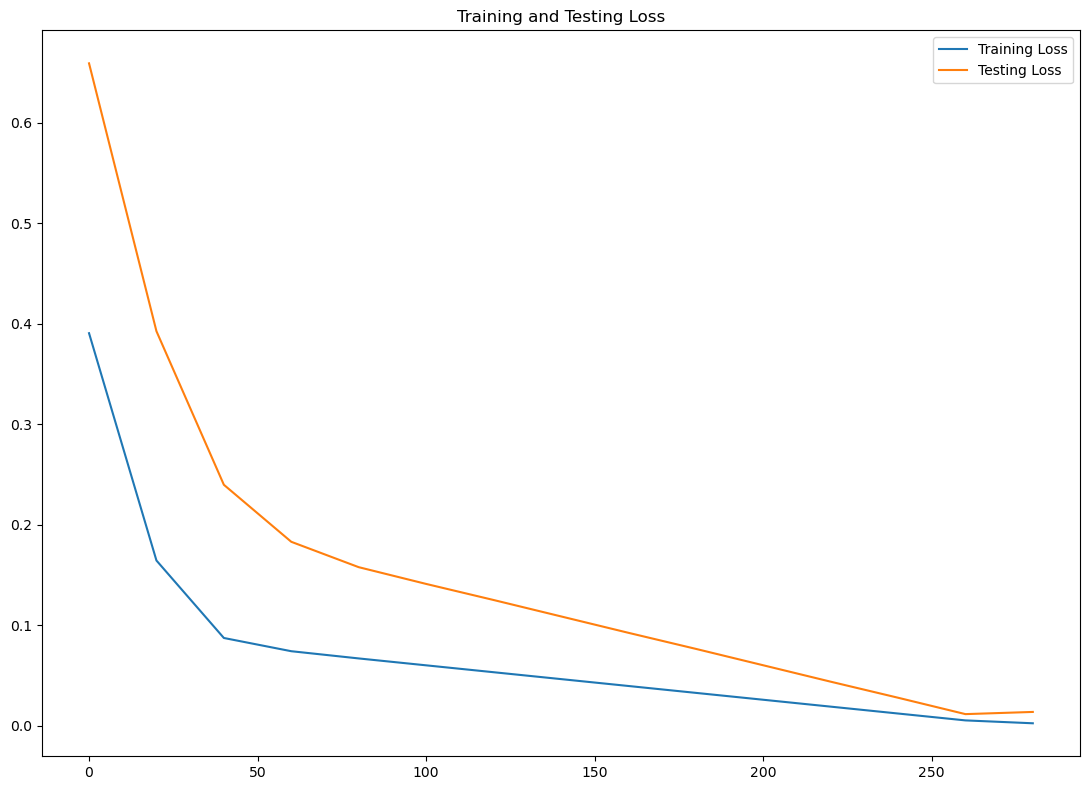

In [71]:
plt.figure(figsize=(11, 8))
plt.plot(epoch_list, trainLoss_list, label="Training Loss")
plt.plot(epoch_list,testLoss_list, label="Testing Loss")
plt.title("Training and Testing Loss")
plt.legend()
plt.tight_layout()
plt.show()

## Save your trained model's state_dict() to file.
- Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
- Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [83]:
from pathlib import Path

MODEL_PATH = Path("saved_models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME="01_torchWorkflow_exerciseModel.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj=model_01_exercise.state_dict(), f=MODEL_SAVE_PATH)

In [84]:
loaded_model=LinearRegressionExercise()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model.to(device)

LinearRegressionExercise(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [85]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2948]], device='mps:0')),
             ('linear_layer.bias', tensor([0.9045], device='mps:0'))])

In [86]:
make_prediction = loaded_model(X_test)
predict=predict.to(device)
predict == make_prediction

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='mps:0')